In [11]:
# Dependencies
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import linregress
import numpy as np
%matplotlib inline

In [12]:
# retreive City raw data
CityRawData = 'city_data.csv'
CityRawData_df = pd.read_csv(CityRawData)
CityRawData_df = pd.DataFrame(CityRawData_df.groupby(['city','type'])['driver_count'].sum())
CityRawData_df = CityRawData_df.reset_index()
CityRawData_df.head()

,city,type,driver_count
0,Alvarezhaven,Urban,21
1,Alyssaberg,Urban,67
2,Anitamouth,Suburban,16
3,Antoniomouth,Urban,21
4,Aprilchester,Urban,49


In [13]:
# retreive Rides raw data
RideRawData = 'ride_data.csv'
RideRawData_df = pd.read_csv(RideRawData)
RideRawData_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [14]:
#Create a dataframe with required columns from Rides data
AverageRide = pd.DataFrame(round(RideRawData_df.groupby(['city'])['fare'].mean()))
AverageRide['TotalRides'] = pd.DataFrame(RideRawData_df.groupby(['city'])['ride_id'].count())
AverageRide = AverageRide.reset_index()
AverageRide.head()

# merge Rides data with City data into key variables dataframe
KeyVariables = AverageRide.merge(CityRawData_df, on='city', how='left')
KeyVariables.head()

,city,fare,TotalRides,type,driver_count
0,Alvarezhaven,24.0,31,Urban,21
1,Alyssaberg,21.0,26,Urban,67
2,Anitamouth,37.0,9,Suburban,16
3,Antoniomouth,24.0,22,Urban,21
4,Aprilchester,22.0,19,Urban,49


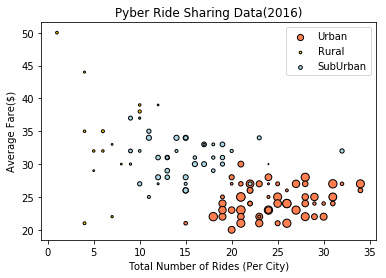

In [15]:
# Bubble plot for Rides and Fare details
plt.scatter(x=Urban["TotalRides"], y=Urban['fare'],s=UrbanSize,c='coral',edgecolors="black", label = "Urban")
plt.scatter(x=Rural['TotalRides'], y=Rural['fare'],s=RuralSize,c='gold',edgecolors="black",label = "Rural")
plt.scatter(x=SubUrban['TotalRides'], y=SubUrban['fare'],s=SubUrbanSize,c='lightblue',edgecolors="black",label = "SubUrban")
plt.legend()
plt.title("Pyber Ride Sharing Data(2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare($)")
plt.show()

Analysis 1: More Riders in Urban vs Rural Areas
Analysis 2: Cost lower in Urban Areas depict probably shorter distance

Text(0.5,1,'% of Total Fares by City Type')

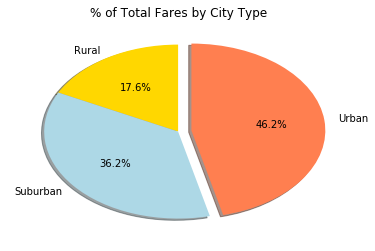

In [16]:
# Pie chart for % of Total Fares by City Type
TypeValues = pd.DataFrame(KeyVariables.groupby(['type'])['fare'].sum())
Lable = TypeValues.reset_index()
Lable = Lable['type']
colors = ["gold","lightblue","coral"]
plt.pie(TypeValues, shadow=True, colors=colors, startangle=90,explode=[0,0,0.1],labels=Lable,autopct="%1.1f%%")
plt.title("% of Total Fares by City Type")

Text(0.5,1,'% of Total Rides by City Type')

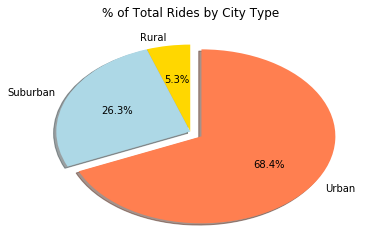

In [17]:
# Pie chart for % of Total Rides by City Type
TypeRides = pd.DataFrame(KeyVariables.groupby(['type'])['TotalRides'].sum())
RLable = TypeRides.reset_index()
RLable = RLable['type']
Rcolors = ["gold","lightblue","coral"]
plt.pie(TypeRides, shadow=True, colors=Rcolors, startangle=90,explode=[0,0,0.1],labels=RLable,autopct="%1.1f%%")
plt.title("% of Total Rides by City Type")

Text(0.5,1,'% of Total Drivers by City Type')

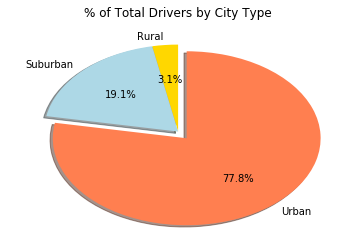

In [18]:
# Pie chart for % of Total Drivers by City Type
TypeDriver = pd.DataFrame(KeyVariables.groupby(['type'])['driver_count'].sum())
DLable = TypeDriver.reset_index()
DLable = DLable['type']
Dcolors = ["gold","lightblue","coral"]
plt.pie(TypeDriver, shadow=True, colors=Dcolors, startangle=90,explode=[0,0,0.1],labels=DLable,autopct="%1.1f%%")
plt.title("% of Total Drivers by City Type")

Analysis 3: The ratio of Drivers vs Fare vs Riders is (somewhat) proportal between the types (urban, rural, suburban)

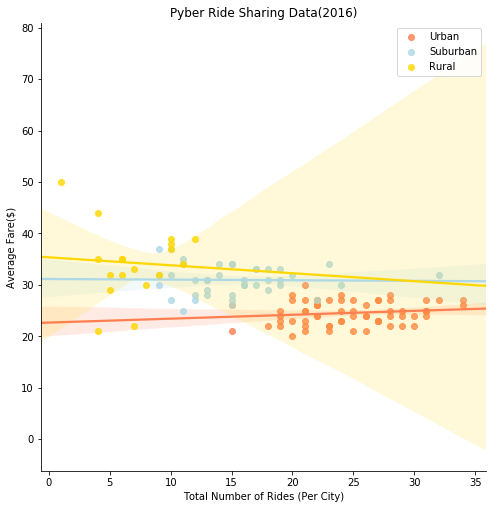

In [19]:
# Create dataframe with Urban details & count for bubble size
Urban = KeyVariables[KeyVariables['type'] =='Urban']
UrbanSize = Urban['driver_count']

# Create dataframe with SubUrban details & count for bubble sizev
SubUrban = KeyVariables[KeyVariables['type'] =='Suburban']
SubUrbanSize = SubUrban['driver_count']

# Create dataframe with Rural details & count for bubble size
Rural = KeyVariables[KeyVariables['type'] =='Rural']
RuralSize = Rural['driver_count']
Color = {'Urban':'coral', 'Suburban':'lightblue','Rural':'gold'}


KeyVariablesSize = KeyVariables['driver_count']
#test = KeyVariables.plot.scatter(x='TotalRides', y='fare',s='KeyVariablesSize', c=KeyVariables['type'].apply(lambda x: colors[x]))

#Seaborn bubble plot (Color intensity defined for fare size instead of bubble size)
sns.lmplot(data=KeyVariables, x='TotalRides', y='fare',fit_reg=True,hue='type',palette=Color,size=7,legend=False)
plt.title("Pyber Ride Sharing Data(2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare($)")
plt.legend(loc='upper right')


Just tried bubble plot with seaborn and included Regression